#**Washington DC Felony Sentences**

###**Introduction:** Felonies have been a major concern in the US in the recent times.Young population are being involved in crime intentionally or unintentionally.Unlike counties,we see many day-to-day crimes in the headlines in the downtowns of major cities.My objective is to let people know what crime they are doing and what sentence they get depending on their age and crime they have committed.

###**Objective:**To predict and classify the sentence type of offense depending on the offense,age, offense category.

### **Dataset Description**
####This dataset has been retreived from **'Open Data DC'**.This dataset contains all felony counts sentenced from 2010 onward and includes offender demographic information such as gender, race, and age, as well as sentencing information such as the offense, offense severity group, and the type and length of sentence imposed. The dataset is updated annually.

######**Link to dataset:** [https://opendata.dc.gov/datasets/DCGIS::felony-sentences/explore](https://opendata.dc.gov/datasets/DCGIS::felony-sentences/explore)

**This dataset has 24,676 observations and has 28 columns**

1. **OBJECTID:**( type: esriFieldTypeOID, alias: OBJECTID )
  
    Internal feature number.
2. **RID:**( type: esriFieldTypeString, alias: RID, length: 255)
  
    Row number, sequential
3. **GENERIC_CASE_ID:** ( type: esriFieldTypeString, alias: GENERIC_CASE_ID, length: 255)

  Randomly generated unique identifier for cases
4. **GENERIC_OFFENDER_ID:**( type: esriFieldTypeString, alias: GENERIC_OFFENDER_ID, length: 255)

  Randomly generated unique identifier for offenders
5. **CHARGE_NUMBER:**(type: esriFieldTypeDouble, alias: CHARGE_NUMBER)

  Specific charge number within a case
6. **SENTENCE_YEAR** (type: esriFieldTypeDouble, alias: SENTENCE_YEAR)

  The year the case was sentenced
7. **RACE:**(type: esriFieldTypeString, alias: RACE, length: 255)

  Race of the accused
8. **GENDER:** (type: esriFieldTypeString, alias: GENDER, length: 255)

  Gender of accused
9. **AGE_GROUP:** (type: esriFieldTypeString, alias: AGE_GROUP, length: 255)
  
  Age group at the time of offense
10. **OFFENSE:** (type: esriFieldTypeString, alias: OFFENSE, length: 255)

  The offense of conviction within a case
11. **OFFENSE_TYPE:** (type: esriFieldTypeString, alias: OFFENSE_TYPE, length: 255)

  The category for the offense of conviction
12. **HOMICIDE_TYPE:**(type: esriFieldTypeString, alias: HOMICIDE_TYPE, length: 255)

  The type of homicide, if the offense was homicide
13. **OFFENSE_SEVERITY_GROUP:**( type: esriFieldTypeString, alias:OFFENSE_SEVERITY_GROUP, length: 255)

  The sentencing guidelines ranking for the offense of conviction

14. **SENTENCE_TYPE:** ( type: esriFieldTypeString, alias: SENTENCE_TYPE, length: 255 )

  The type of sentence imposed for the offense of conviction
15. **SENTENCE_IMPOSED_MONTHS:** ( type: esriFieldTypeDouble, alias: SENTENCE_IMPOSED_MONTHS)

  The prison sentence length imposed in months Not available for indeterminate and life sentences; A value of 1 month may indicate that the defendant may have been sentenced to time served, the actual value of which is not available to the Commission.
16. **SENTENCE_SUSPENDED_MONTHS:**(type: esriFieldTypeDouble,alias: SENTENCE_SUSPENDED_MONTHS)
  
  The prison sentence length suspended in months
17. **SENTENCE_TO_SERVE_MONTHS:**(type: esriFieldTypeDouble, alias: SENTENCE_TO_SERVE_MONTHS)

  The amount of time to serve in prison Not available for indeterminate and life sentences; A value of 1 month may indicate that the defendant may have been sentenced to time served, the actual value of which is not available to the Commission
18. **SENTENCE_PROBATION_MONTHS:**(type: esriFieldTypeDouble, alias: SENTENCE_PROBATION_MONTHS )-The probation sentence length imposed in months
19. **VVCA_AMT:** ( type: esriFieldTypeDouble, alias: VVCA_AMT )

  A court-ordered payment under the Victims of Violent Crime Compensation Act (VVCA) that goes to the Crime Victims Compensation Program
20. **FINE_AMT:** ( type: esriFieldTypeDouble, alias: FINE_AMT )-The amount of court fines imposed
21. **RESTITUTION_AMT:** ( type: esriFieldTypeDouble, alias: RESTITUTION_AMT )

   The amount of restitution (the amount that the offender is ordered to pay the victim for damages that the victim suffered as a result of the crime)
22. **FINE_SUSPENDED_AMT:** ( type: esriFieldTypeDouble, alias: FINE_SUSPENDED_AMT )

  The amount of court fines imposed that were suspended
23. **GIS_ID:** ( type: esriFieldTypeString, alias: GIS_ID, length: 50 )
24. **GLOBALID:** ( type: esriFieldTypeGlobalID, alias: GLOBALID, length: 38 )
25. **CREATOR:** ( type: esriFieldTypeString, alias: CREATOR, length: 255 )
26. **CREATED:** ( type: esriFieldTypeDate, alias: CREATED, length: 8 )
27. **EDITOR:** ( type: esriFieldTypeString, alias: EDITOR, length: 255 )
28. **EDITED:** ( type: esriFieldTypeDate, alias: EDITED, length: 8 )

## **Importing necessary libraries for EDA and Classification**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
!pip install squarify

In [3]:
import squarify

##**Loading Data**

In [4]:
df=pd.read_csv('/content/Felony_Sentences.csv')

In [5]:
df

,OBJECTID,RID,GENERIC_CASE_ID,GENERIC_OFFENDER_ID,CHARGE_NUMBER,SENTENCE_YEAR,RACE,GENDER,AGE_GROUP,OFFENSE,OFFENSE_TYPE,HOMICIDE_TYPE,OFFENSE_SEVERITY_GROUP,SENTENCE_TYPE,SENTENCE_IMPOSED_MONTHS,SENTENCE_SUSPENDED_MONTHS,SENTENCE_TO_SERVE_MONTHS,SENTENCE_PROBATION_MONTHS,VVCA_AMT,FINE_AMT,RESTITUTION_AMT,FINE_SUSPENDED_AMT,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED
0,1,39,7548270,7241253,3,2020,Black,M,22-30,Aggravated Assault Knowingly,Violent,NaN,M6,Incarceration,42.0,0.0,42.0,0.0,100,NaN,NaN,NaN,Felony_Sentences_1,{F8F4B0A9-C6CD-4D91-B878-DAFA4C9FF3CE},NaN,NaN,NaN,NaN
1,2,40,7548270,7241253,7,2020,Black,M,22-30,Unlawful Possession of a Firearm,Weapon,NaN,M8,Incarceration,24.0,0.0,24.0,0.0,100,NaN,NaN,NaN,Felony_Sentences_2,{2845886A-02B7-4D93-80DA-9468C5946DB8},NaN,NaN,NaN,NaN
2,3,41,2815732,5135695,3,2020,Black,M,22-30,Unlawful Possession of a Firearm (Crime of Vio...,Weapon,NaN,M6,Incarceration,36.0,0.0,36.0,0.0,100,0.0,0.0,0.0,Felony_Sentences_3,{4BF74DE0-05D1-4590-9F9E-07A77C54DA53},NaN,NaN,NaN,NaN
3,4,42,2815732,5135695,4,2020,Black,M,22-30,Unlawful Possession of a Firearm (Crime of Vio...,Weapon,NaN,M6,Incarceration,36.0,0.0,36.0,0.0,100,0.0,0.0,0.0,Felony_Sentences_4,{F7E0410A-8480-4B64-8760-59513962459A},NaN,NaN,NaN,NaN
4,5,43,7703087,7383706,1,2020,Black,F,61-70,Voluntary Manslaughter,Homicide,Voluntary Manslaughter,M4,Incarceration,1.0,0.0,1.0,0.0,100,0.0,0.0,0.0,Felony_Sentences_5,{F5E5096E-62D8-4162-BD74-C588790DD805},NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24671,24672,22905,1491047,8932160,1,2010,Black,M,51-60,Distribution Of a Controlled Substance,Drug,NaN,D3,Incarceration,14.0,0.0,14.0,0.0,100,NaN,NaN,NaN,Felony_Sentences_24672,{16C23F59-68FF-4A44-B8D8-AD68A3771CE0},NaN,NaN,NaN,NaN
24672,24673,22906,7414567,9851958,1,2010,Black,M,22-30,Assault On A Police Officer,Violent,NaN,M7,Incarceration,18.0,0.0,18.0,0.0,100,NaN,NaN,NaN,Felony_Sentences_24673,{74144B90-A097-49C0-B697-0FDB90490C39},NaN,NaN,NaN,NaN
24673,24674,22907,7776569,1054438,1,2010,Black,M,41-50,Distribution Of a Controlled Substance,Drug,NaN,D2,Long Split,48.0,36.0,12.0,18.0,100,NaN,NaN,NaN,Felony_Sentences_24674,{A137C392-13B5-472A-B481-BF3763832DBD},NaN,NaN,NaN,NaN
24674,24675,22908,7093372,2805724,1,2010,Black,M,61-70,Distribution Of a Controlled Substance,Drug,NaN,D3,Probation,6.0,6.0,0.0,6.0,100,NaN,NaN,NaN,Felony_Sentences_24675,{8D09E9D0-797F-49DC-B079-A30749C611EF},NaN,NaN,NaN,NaN


###**Data Cleanup**

In [6]:
df.columns

Index(['OBJECTID', 'RID', 'GENERIC_CASE_ID', 'GENERIC_OFFENDER_ID',
       'CHARGE_NUMBER', 'SENTENCE_YEAR', 'RACE', 'GENDER', 'AGE_GROUP',
       'OFFENSE', 'OFFENSE_TYPE', 'HOMICIDE_TYPE', 'OFFENSE_SEVERITY_GROUP',
       'SENTENCE_TYPE', 'SENTENCE_IMPOSED_MONTHS', 'SENTENCE_SUSPENDED_MONTHS',
       'SENTENCE_TO_SERVE_MONTHS', 'SENTENCE_PROBATION_MONTHS', 'VVCA_AMT',
       'FINE_AMT', 'RESTITUTION_AMT', 'FINE_SUSPENDED_AMT', 'GIS_ID',
       'GLOBALID', 'CREATOR', 'CREATED', 'EDITOR', 'EDITED'],
      dtype='object')

In [7]:
print(f'Rows: {df.shape[0]:,}')
print(f'Columns: {df.shape[1]:,}')

Rows: 24,676
Columns: 28


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24676 entries, 0 to 24675
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OBJECTID                   24676 non-null  int64  
 1   RID                        24676 non-null  int64  
 2   GENERIC_CASE_ID            24676 non-null  int64  
 3   GENERIC_OFFENDER_ID        24676 non-null  int64  
 4   CHARGE_NUMBER              24676 non-null  int64  
 5   SENTENCE_YEAR              24676 non-null  int64  
 6   RACE                       24676 non-null  object 
 7   GENDER                     24449 non-null  object 
 8   AGE_GROUP                  24580 non-null  object 
 9   OFFENSE                    24676 non-null  object 
 10  OFFENSE_TYPE               24676 non-null  object 
 11  HOMICIDE_TYPE              761 non-null    object 
 12  OFFENSE_SEVERITY_GROUP     24676 non-null  object 
 13  SENTENCE_TYPE              24676 non-null  obj

In [9]:
df.describe(include='all')

,OBJECTID,RID,GENERIC_CASE_ID,GENERIC_OFFENDER_ID,CHARGE_NUMBER,SENTENCE_YEAR,RACE,GENDER,AGE_GROUP,OFFENSE,OFFENSE_TYPE,HOMICIDE_TYPE,OFFENSE_SEVERITY_GROUP,SENTENCE_TYPE,SENTENCE_IMPOSED_MONTHS,SENTENCE_SUSPENDED_MONTHS,SENTENCE_TO_SERVE_MONTHS,SENTENCE_PROBATION_MONTHS,VVCA_AMT,FINE_AMT,RESTITUTION_AMT,FINE_SUSPENDED_AMT,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED
count,24676.000000,24676.000000,2.467600e+04,2.467600e+04,24676.000000,24676.000000,24676,24449,24580,24676,24676,761,24676,24676,24556.000000,24556.000000,24556.000000,24556.000000,24676.000000,16347.000000,16340.000000,16299.000000,24676,24676,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,7,2,8,231,7,4,13,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24676,24676,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Black,M,22-30,Distribution Of a Controlled Substance,Violent,Murder II,M8,Incarceration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Felony_Sentences_21801,{E6826841-F98F-4DC5-9815-E0AD0FC9F69E},NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,22487,22556,8478,2963,6852,299,7574,14278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
mean,12338.500000,12338.500000,4.985362e+06,5.062825e+06,2.667207,2014.114848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.824768,6.041049,29.858568,7.961150,128.322621,2.461347,394.594737,0.490828,NaN,NaN,NaN,NaN,NaN,NaN
std,7123.491957,7123.491957,2.895655e+06,2.872369e+06,4.505582,3.008751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.511696,11.132231,55.012991,12.267196,200.256738,79.482109,5037.409975,41.445884,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.306000e+03,1.601000e+03,1.000000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,6169.750000,6169.750000,2.448699e+06,2.602985e+06,1.000000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,0.000000,1.000000,0.000000,100.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,12338.500000,12338.500000,4.971252e+06,5.111547e+06,1.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,0.000000,12.000000,0.000000,100.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,18507.250000,18507.250000,7.472029e+06,7.530929e+06,2.000000,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,12.000000,34.000000,12.000000,100.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Column')

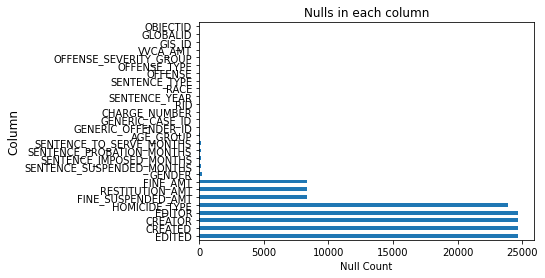

In [10]:
df.isnull().sum().sort_values(ascending=False).plot(kind='barh')
plt.title('Nulls in each column')
plt.xlabel('Null Count')
plt.ylabel('Column',fontsize=12)

Though this dataset has 28 columns.I omitted 'GIS_ID','GLOBALID', 'CREATOR', 'CREATED', 'EDITOR', 'EDITED' columns because they dont have significant information for analysis.

In [11]:
df_1=df.drop(columns=['OBJECTID', 'RID', 'GENERIC_CASE_ID','HOMICIDE_TYPE','GENERIC_OFFENDER_ID', 'GIS_ID',
       'GLOBALID', 'CREATOR', 'CREATED', 'EDITOR', 'EDITED','VVCA_AMT',
       'FINE_AMT', 'RESTITUTION_AMT', 'FINE_SUSPENDED_AMT','SENTENCE_TO_SERVE_MONTHS', 'SENTENCE_PROBATION_MONTHS','SENTENCE_SUSPENDED_MONTHS'])

* Columns 'OBJECTID', 'RID', 'GENERIC_CASE_ID','GENERIC_OFFENDER_ID' are dropped because they are not continuous varbiables but random random sequences.
* Column 'HOMICIDE_TYPE' can be used for analysis but is dropped because it has almost 22000 nulls.Even if we do imputing, its values will be duplicated.
* 'VVCA_AMT','FINE_AMT', 'RESTITUTION_AMT', 'FINE_SUSPENDED_AMT' are dropped since my objective is to predict the sentence type and not the amount to be imposed.


In [12]:
df_1

,CHARGE_NUMBER,SENTENCE_YEAR,RACE,GENDER,AGE_GROUP,OFFENSE,OFFENSE_TYPE,OFFENSE_SEVERITY_GROUP,SENTENCE_TYPE,SENTENCE_IMPOSED_MONTHS
0,3,2020,Black,M,22-30,Aggravated Assault Knowingly,Violent,M6,Incarceration,42.0
1,7,2020,Black,M,22-30,Unlawful Possession of a Firearm,Weapon,M8,Incarceration,24.0
2,3,2020,Black,M,22-30,Unlawful Possession of a Firearm (Crime of Vio...,Weapon,M6,Incarceration,36.0
3,4,2020,Black,M,22-30,Unlawful Possession of a Firearm (Crime of Vio...,Weapon,M6,Incarceration,36.0
4,1,2020,Black,F,61-70,Voluntary Manslaughter,Homicide,M4,Incarceration,1.0
...,...,...,...,...,...,...,...,...,...,...
24671,1,2010,Black,M,51-60,Distribution Of a Controlled Substance,Drug,D3,Incarceration,14.0
24672,1,2010,Black,M,22-30,Assault On A Police Officer,Violent,M7,Incarceration,18.0
24673,1,2010,Black,M,41-50,Distribution Of a Controlled Substance,Drug,D2,Long Split,48.0
24674,1,2010,Black,M,61-70,Distribution Of a Controlled Substance,Drug,D3,Probation,6.0


####Dropping Nulls

In [13]:
df_1.isnull().sum().sort_values(ascending=False)

GENDER                     227
SENTENCE_IMPOSED_MONTHS    120
AGE_GROUP                   96
SENTENCE_TYPE                0
OFFENSE_SEVERITY_GROUP       0
OFFENSE_TYPE                 0
OFFENSE                      0
RACE                         0
SENTENCE_YEAR                0
CHARGE_NUMBER                0
dtype: int64

In [14]:
df_1.dropna(inplace=True)

In [15]:
df_1.isnull().sum().sort_values(ascending=False)

SENTENCE_IMPOSED_MONTHS    0
SENTENCE_TYPE              0
OFFENSE_SEVERITY_GROUP     0
OFFENSE_TYPE               0
OFFENSE                    0
AGE_GROUP                  0
GENDER                     0
RACE                       0
SENTENCE_YEAR              0
CHARGE_NUMBER              0
dtype: int64

In [16]:
df_1.shape

(24234, 10)

**So, Final dataset has 24324 rows and 10 columns**

##**Exploratory Data Analysis**

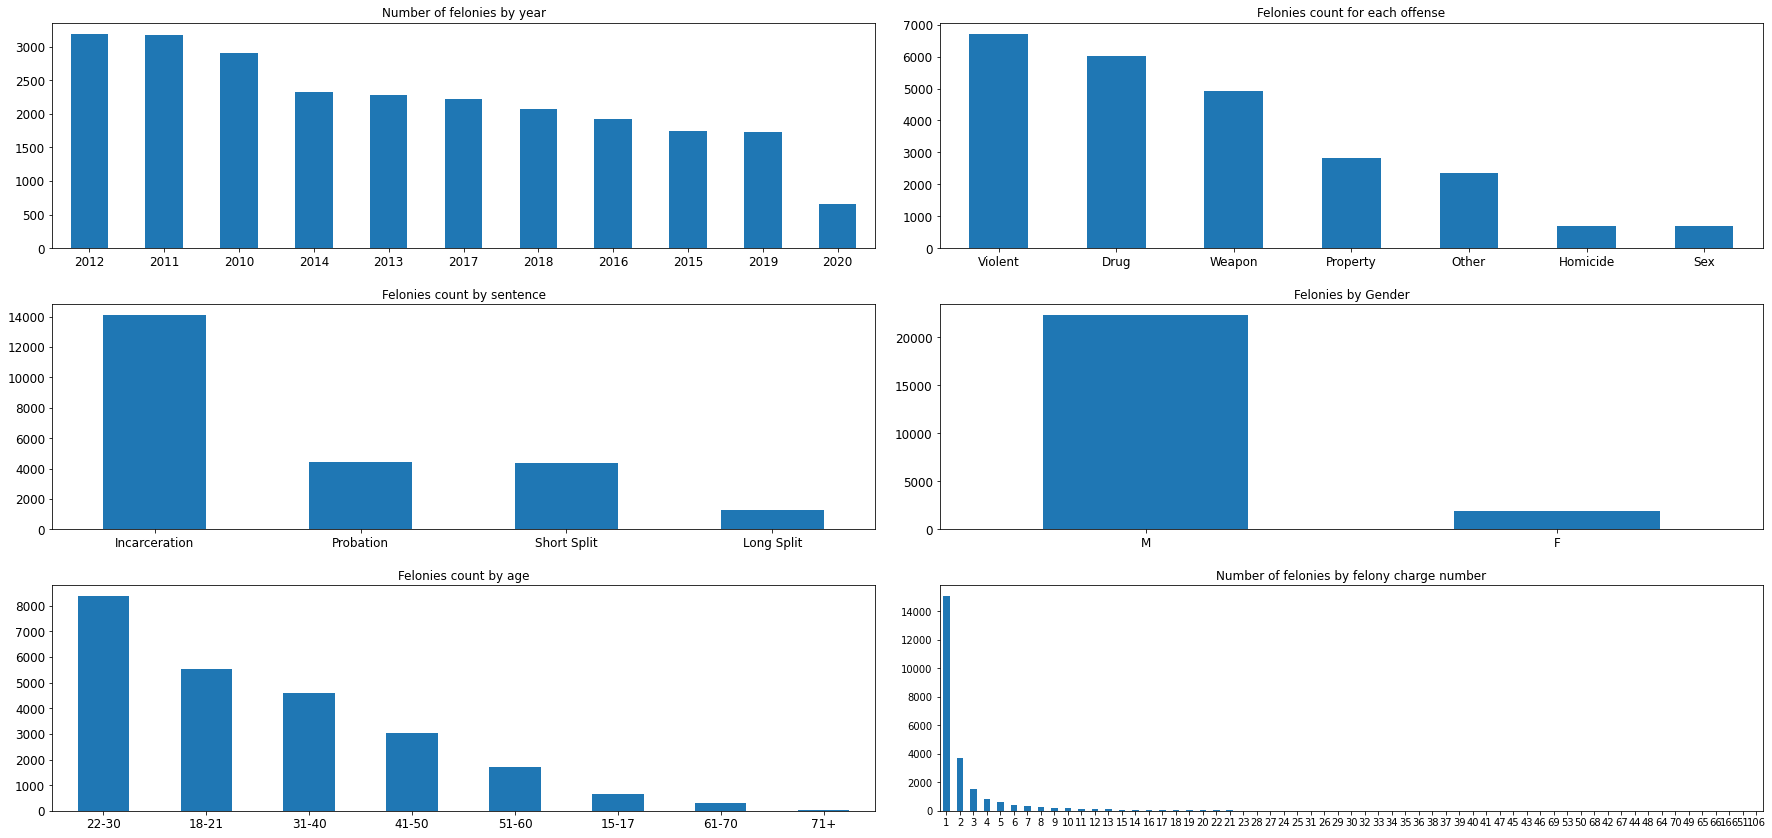

In [17]:
plt.subplot(321)
df_1['SENTENCE_YEAR'].value_counts().plot(kind='bar',title='Number of felonies by year',fontsize=12, figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(322)
df_1['OFFENSE_TYPE'].value_counts().plot(kind='bar',title='Felonies count for each offense',fontsize=12,figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(323)
df_1['SENTENCE_TYPE'].value_counts().plot(kind='bar',title='Felonies count by sentence',fontsize=12,figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(324)
df_1['GENDER'].value_counts().plot(kind='bar',title='Felonies by Gender',fontsize=12,figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(325)
df_1['AGE_GROUP'].value_counts().plot(kind='bar',title='Felonies count by age',fontsize=12,figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(326)
df_1['CHARGE_NUMBER'].value_counts().plot(kind='bar', title='Number of felonies by felony charge number',figsize=(25,12))
plt.xticks(rotation=0)

plt.tight_layout(pad=2)
plt.show()

* **Number of felonies by year:** 
  
  From the distirbutions, we can observe that the number of felonies have decreased over time.This might be due to the awareness among people or due to unreported cases.
* **Felonies count for each offense:**

  Felonies by type 'violent' are the highest followed by type 'Drug'.Sex felonies are the least in DC from 2010 to 2020.
* **Felonies count by sentence:**

   Incarceration is the most serious sentence type among all the felonies.Whereas the number of sentences for probation and short split are on par with each other.Long split is rarely sentenced.

* **Felonies by Gender:** 

  Male population has committed most number of felonies accounting around 22000 while Females accounted to low value of 3000.
* **Felonies by count by age:**

  It is evident from the distribution that young people aged 18-30 are more tended to commit a crime compared to elders.Obviously, old aged people aged 71+ are not accused much.
* **Felonies by Number of felonies by felony charge number:**

  This distribution shows the number of felonies by charge number.Charge number is nothing but severity of crime.People are often charged by number '1'.

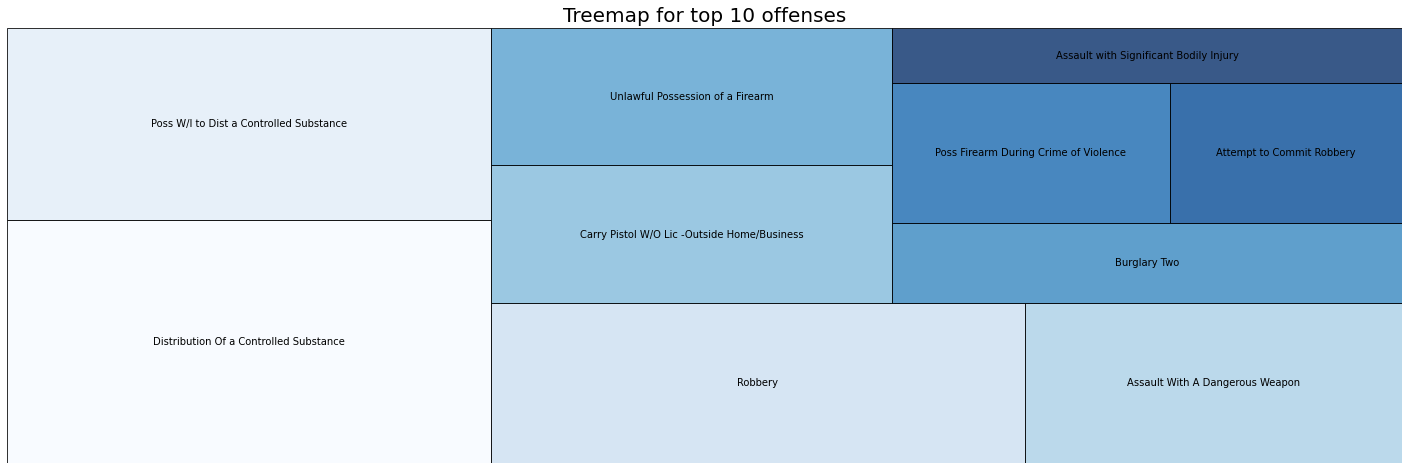

In [18]:
offense= df_1['OFFENSE'].value_counts().head(10) 
plt.rcParams['figure.figsize'] = (25, 8)
ax=squarify.plot(sizes = offense.values, label = offense.index,ec='black', alpha=.8, color = plt.cm.Blues(np.linspace(0,1,10)))
plt.title('Treemap for top 10 offenses', fontsize = 20)
plt.axis('off')
plt.show()

This treemap shows top ten offenses in Washington DC.Assualt is the offense people committed most often followed by robbery.There are instances where people are charged with double offenses e.g., Posseing a firearm during violence.

**Reference:**https://medium.com/geekculture/how-to-plot-a-treemap-in-python-48743061cfda

In [19]:
corr_data=df_1[['CHARGE_NUMBER','SENTENCE_IMPOSED_MONTHS']]
corr_data.corr()

,CHARGE_NUMBER,SENTENCE_IMPOSED_MONTHS
CHARGE_NUMBER,1.000000,0.150538
SENTENCE_IMPOSED_MONTHS,0.150538,1.000000


Text(0.5, 1.0, 'Correlation between charge number and sentence imposed')

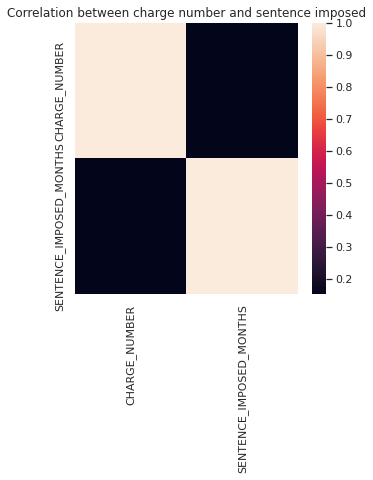

In [20]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(corr_data.corr())
plt.title('Correlation between charge number and sentence imposed')

Charge number and imposed sentence are positively correlated but are weakly correlated.This implies charge number(felony severity) has less impact on felony sentence imposition.

In [21]:
offense_by_type=df_1.groupby(['OFFENSE_TYPE','OFFENSE']).size().to_frame()

In [22]:
offense_by_type = offense_by_type.rename(columns={0: "Count of Offense"})

In [23]:
offense_by_type

Count of Offense
OFFENSE_TYPE OFFENSE                                                             
Drug         Dist of Counterfeit Substance                                      6
             Distribution Of a Controlled Substance                          2926
             Distribution of Controlled Substance to Minor                      6
             Maintaining a Crack House                                          1
             Manufacture or Possessing W/Intent to Manufactu...                 1
...                                                                           ...
Weapon       Unlawful Possession of a Firearm (Crime of Viol...               151
             Unlawful Possession of a Firearm (Fugitive from...                 1
             Unlawful Possession of a Firearm (Intrafamily O...                56
             Unlawful Possession of a Firearm (Order to Reli...                 5
             Unlawful Possession of a Firearm (Prior Convict...                11

[212 rows x 1 columns]

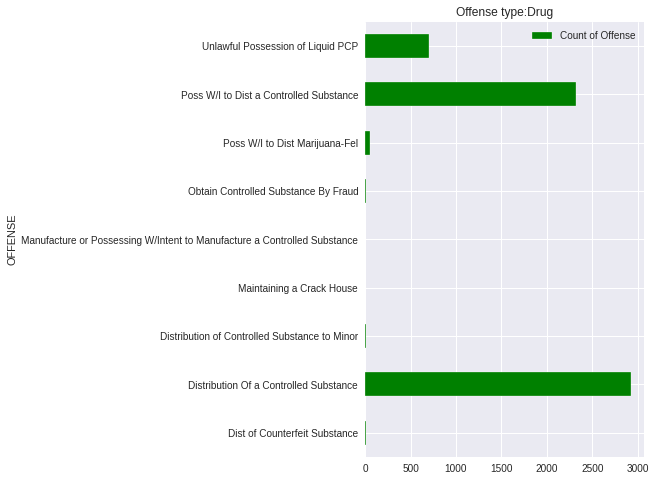

In [24]:
plt.style.use('seaborn')
color = plt.cm.ocean(np.linspace(0, 1, 15))
offense_by_type.xs('Drug').plot(kind='barh',title='Offense type:Drug',figsize=(5,8),color=color)

We can infer from this bar graph that, Offenses related to 'Drug' are mostly due to unlawful possession of liquid PCP,distribution of controlled substance and intentionally possessing a substance.

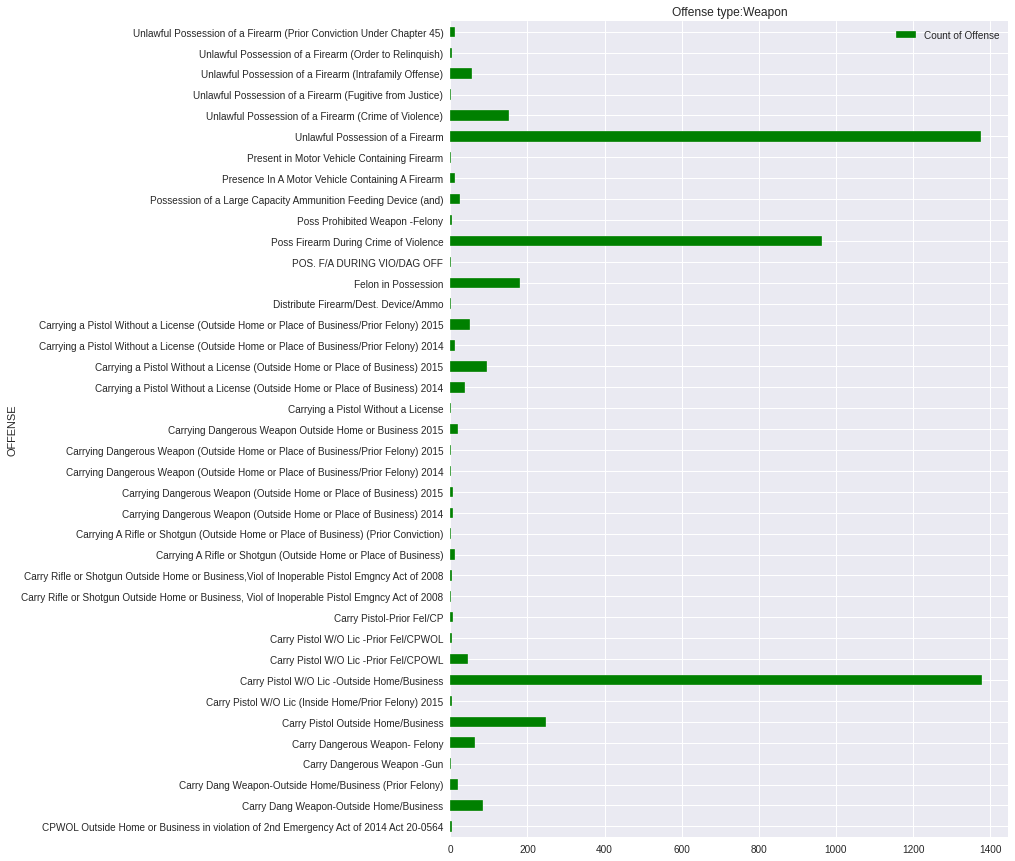

In [25]:
offense_by_type.xs('Weapon').plot(kind='barh',title='Offense type:Weapon',figsize=(10,15),color=color)

This category has many offenses, highest being unlawful possession of firearm followed by carrying pistol without license outside home or business.

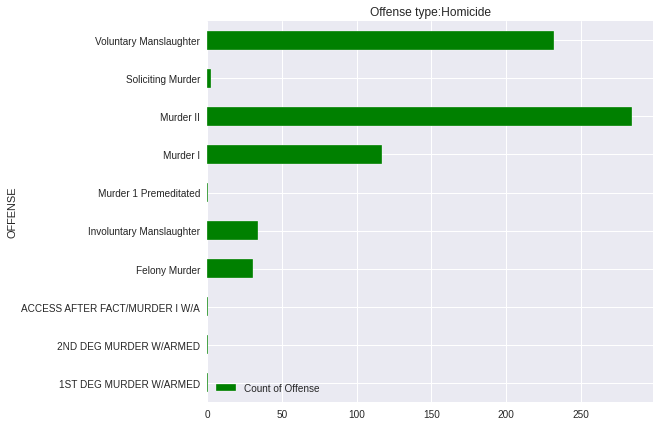

In [26]:
offense_by_type.xs('Homicide').plot(kind='barh',title='Offense type:Homicide',figsize=(8,7),color=color)

Homicides mostly included Voluntary Manslaughter and Muder-II followed by Muder-I.People are not accused seriously for First,Second degree murders without possessing any firearms.

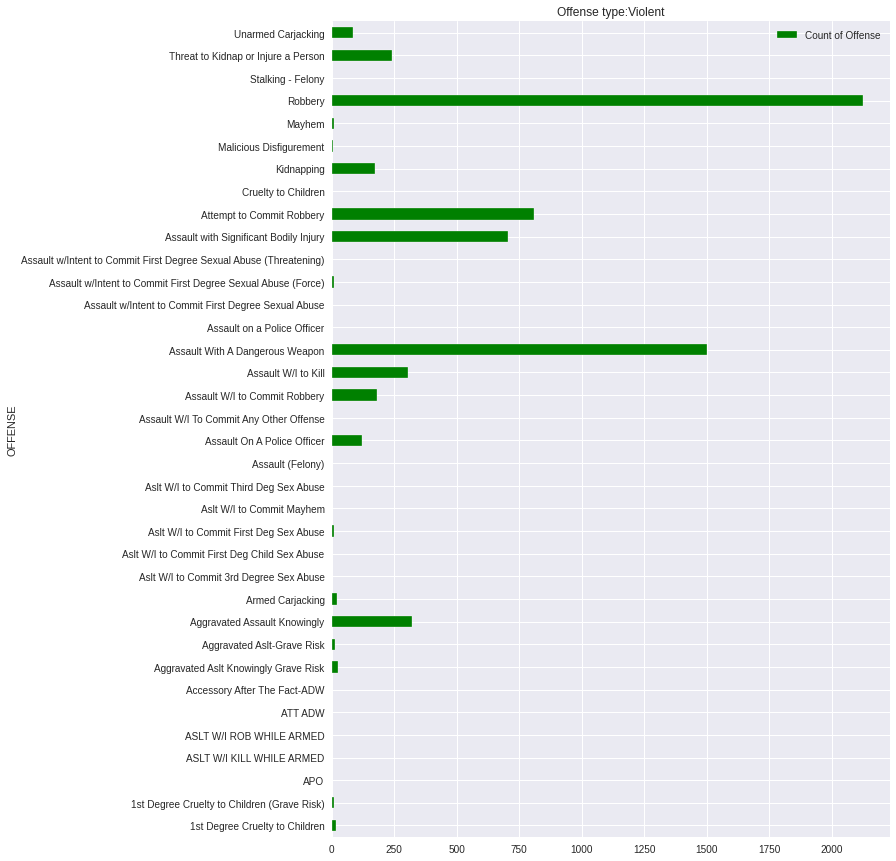

In [27]:
offense_by_type.xs('Violent').plot(kind='barh',title='Offense type:Violent',figsize=(10,15),color=color)

Assualts and Robberies with or without arms are the most common offenses in this category.

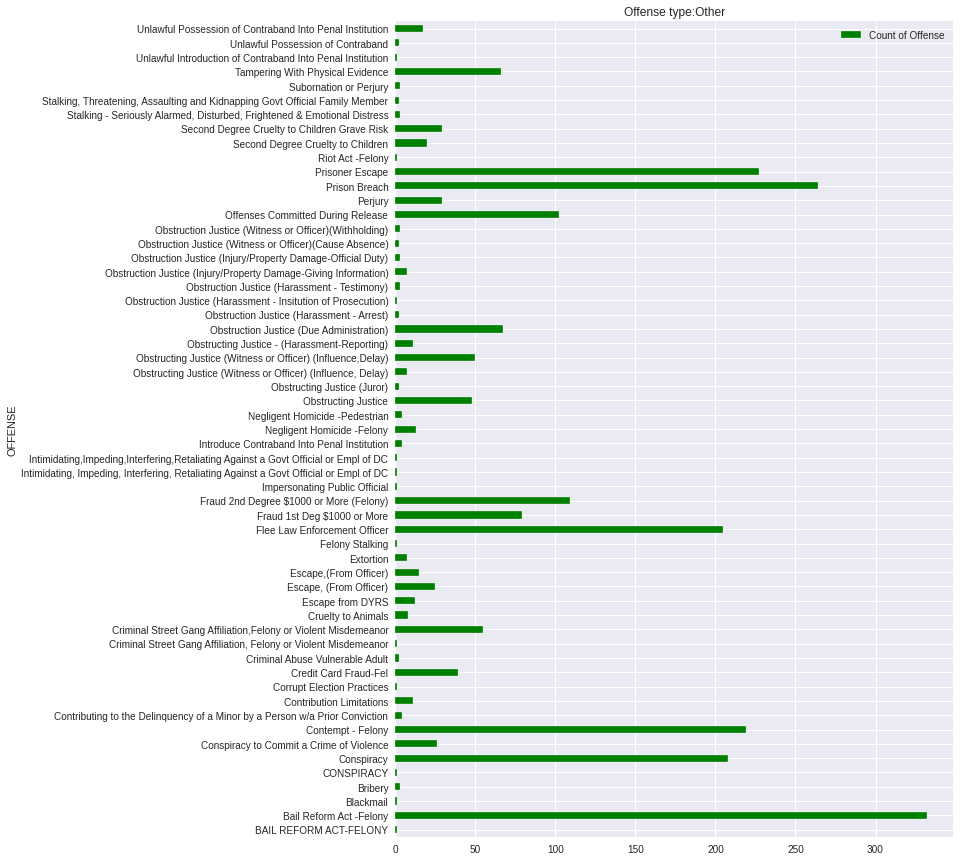

In [28]:
offense_by_type.xs('Other').plot(kind='barh',title='Offense type:Other',figsize=(10,15),color=color)

This can be considered as the largest category with 52 offenses.Bail reform ,Prison and contempt are the top 3 felonies in this category.

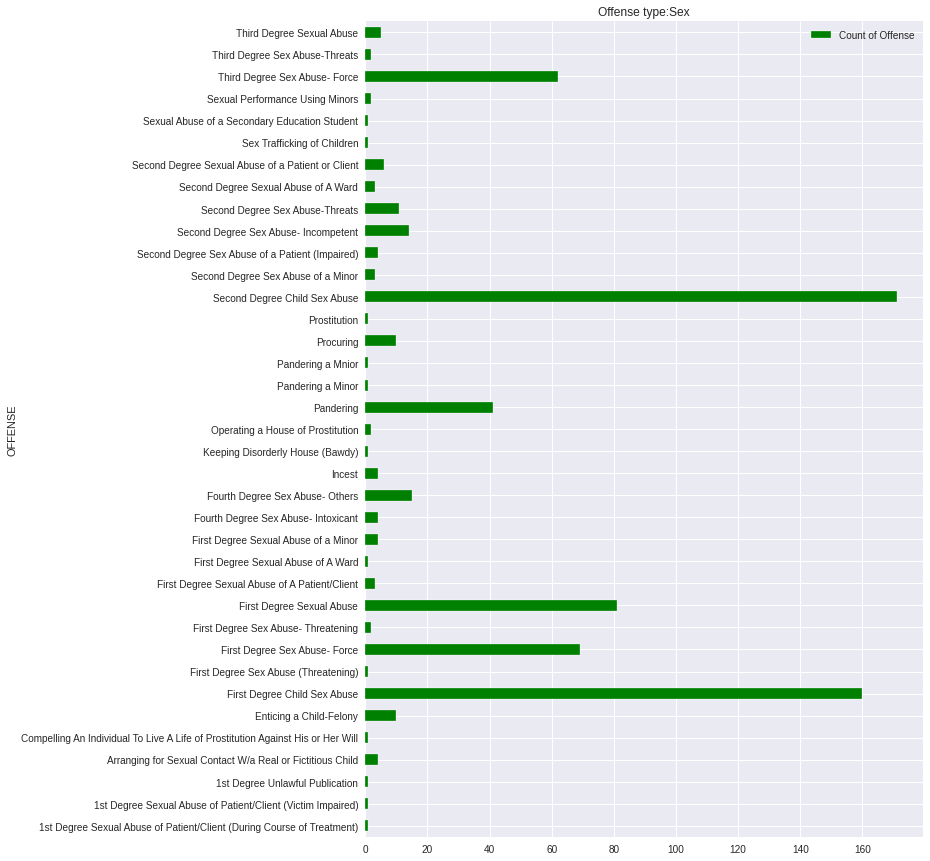

In [29]:
offense_by_type.xs('Sex').plot(kind='barh',title='Offense type:Sex',figsize=(10,15),color=color)

First Degree and second degree child abuse are the most serious offenses in this category followed by first degree sexual abuse

Text(0, 0.5, 'Count by offense type')

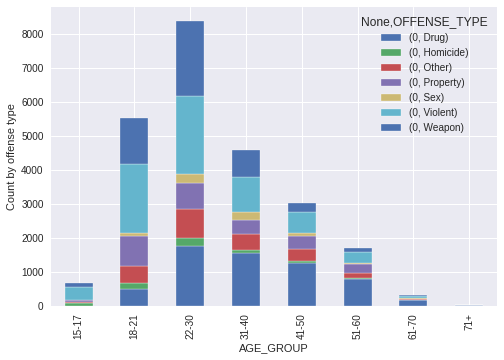

In [30]:
offense_by_age=df_1.groupby(['AGE_GROUP','OFFENSE_TYPE']).size().to_frame()
offense_by_age.unstack().plot(kind='bar',stacked=True)
plt.ylabel('Count by offense type')

This stacked bar graph depicts the offense type for each age group.As explained earlier, people aged between 22-30 committed more crimes.Of these, Drug and Violence categories share same number of sentences whereas sex , homicide share equal sentences.Similar trend can be seen for Property and Other categories.

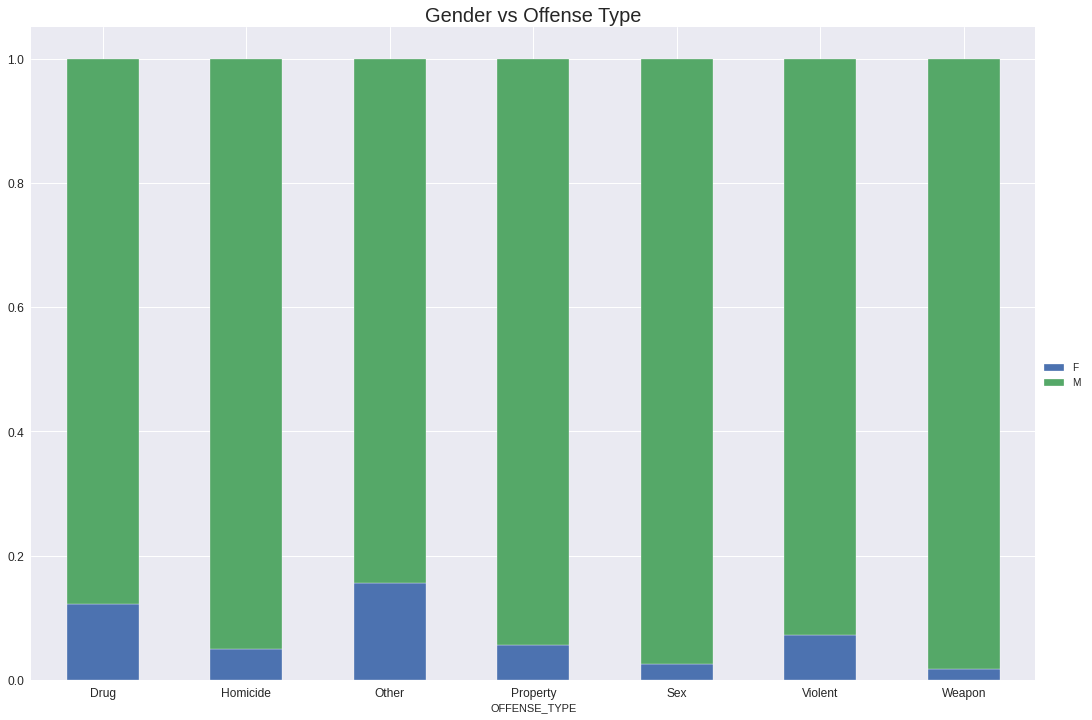

In [31]:
df_cross=pd.crosstab(df_1['OFFENSE_TYPE'],df_1['GENDER'])
df_cross.div(df_cross.sum(1).astype(float), axis = 0).plot.bar(stacked = True,figsize = (18, 12))
plt.title('Gender vs Offense Type', fontweight = 30, fontsize = 20)
plt.legend(bbox_to_anchor=(1,0.5),)
plt.xticks(rotation = 0,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

This crosstab depicts the proportion of offenses committed by a gender for each cateogory.In all cases, Males commited more offenses than Females.

In [32]:
offense_by_year=df_1.groupby(['SENTENCE_YEAR','OFFENSE_TYPE','SENTENCE_TYPE']).size().to_frame()

In [33]:
offense_by_year=offense_by_year.rename(columns={0: "Count"})
offense_by_year=offense_by_year.reset_index()
offense_by_year

,SENTENCE_YEAR,OFFENSE_TYPE,SENTENCE_TYPE,Count
0,2010,Drug,Incarceration,557
1,2010,Drug,Long Split,27
2,2010,Drug,Probation,326
3,2010,Drug,Short Split,246
4,2010,Homicide,Incarceration,65
...,...,...,...,...
283,2020,Violent,Short Split,56
284,2020,Weapon,Incarceration,83
285,2020,Weapon,Long Split,28
286,2020,Weapon,Probation,67


Text(0, 0.5, 'Number of sentences')

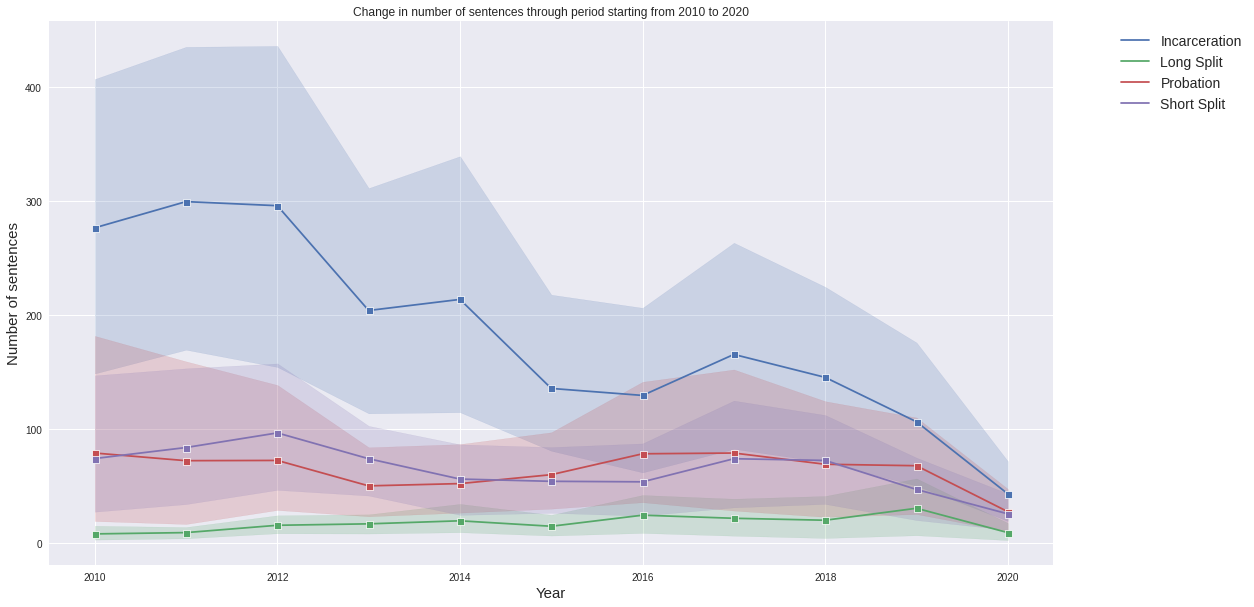

In [34]:
plt.figure(figsize=(18,10))
plot = sns.lineplot(x=offense_by_year['SENTENCE_YEAR'],y=offense_by_year['Count'],hue=offense_by_year["SENTENCE_TYPE"],marker='s', data=offense_by_year)
plot.legend(loc='upper right', bbox_to_anchor=(1.2, 1),fontsize=14)
plt.title("Change in number of sentences through period starting from 2010 to 2020")
plt.xlabel("Year", size=15)
plt.ylabel("Number of sentences", size=15)

This lineplot explains the change in number of cases over years.People are mostly sentenced with incarceration (imprisonment for one year/more  or even death).No of incarcerations are high during the year 2010.But are gradually reduced over time.Probation and Short Split sentences started at around 80 in 2010 and are constant until 2019 but suddenly declined in 2020.Long Split has the least number of sentences among others.It also followed a trend similar to Short Split are very low.

##**Feature Engineering**

In [35]:
df_1

,CHARGE_NUMBER,SENTENCE_YEAR,RACE,GENDER,AGE_GROUP,OFFENSE,OFFENSE_TYPE,OFFENSE_SEVERITY_GROUP,SENTENCE_TYPE,SENTENCE_IMPOSED_MONTHS
0,3,2020,Black,M,22-30,Aggravated Assault Knowingly,Violent,M6,Incarceration,42.0
1,7,2020,Black,M,22-30,Unlawful Possession of a Firearm,Weapon,M8,Incarceration,24.0
2,3,2020,Black,M,22-30,Unlawful Possession of a Firearm (Crime of Vio...,Weapon,M6,Incarceration,36.0
3,4,2020,Black,M,22-30,Unlawful Possession of a Firearm (Crime of Vio...,Weapon,M6,Incarceration,36.0
4,1,2020,Black,F,61-70,Voluntary Manslaughter,Homicide,M4,Incarceration,1.0
...,...,...,...,...,...,...,...,...,...,...
24671,1,2010,Black,M,51-60,Distribution Of a Controlled Substance,Drug,D3,Incarceration,14.0
24672,1,2010,Black,M,22-30,Assault On A Police Officer,Violent,M7,Incarceration,18.0
24673,1,2010,Black,M,41-50,Distribution Of a Controlled Substance,Drug,D2,Long Split,48.0
24674,1,2010,Black,M,61-70,Distribution Of a Controlled Substance,Drug,D3,Probation,6.0


Text(0, 0.5, 'Count of Offenses')

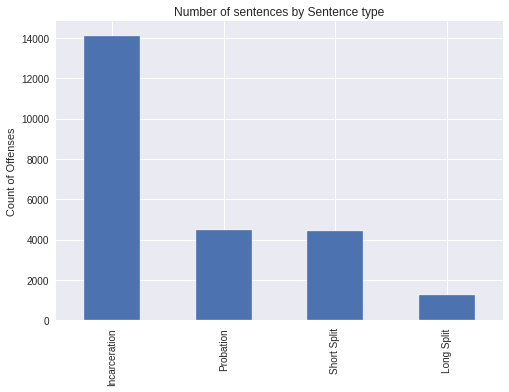

In [36]:
df_1['SENTENCE_TYPE'].value_counts().plot(kind='bar')
plt.title('Number of sentences by Sentence type')
plt.ylabel('Count of Offenses')

In [37]:
df_1['SENTENCE_TYPE'].value_counts()

Incarceration    14115
Probation         4457
Short Split       4402
Long Split        1260
Name: SENTENCE_TYPE, dtype: int64

In [38]:
df_1.replace(to_replace='Short Split',value='Probation',inplace=True)
df_1.replace(to_replace='Long Split',value='Probation',inplace=True)

**My objective is to predict sentence type.But the distribution of classes seams to be imbalanced.There are less samples for Long Split.Short Split Sentence and Long Split means offenders serving some time in prison and some time outside depending on their behaviour.Probation also serves the same purpsose.So,I merged the Short Split and Long Split into Probation and thus making the class distribution balanced and making it a binary classification**

In [39]:
df_1['SENTENCE_TYPE'].value_counts()

Incarceration    14115
Probation        10119
Name: SENTENCE_TYPE, dtype: int64

Text(0, 0.5, 'Count of Sentences')

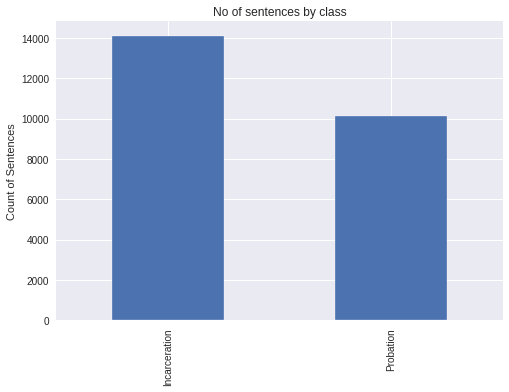

In [40]:
df_1['SENTENCE_TYPE'].value_counts().plot(kind='bar')
plt.title('No of sentences by class')
plt.ylabel('Count of Sentences')

**Now,we can see that classes are balanced**

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_1['OFFENSE'] = le.fit_transform(df_1['OFFENSE'])
df_1['OFFENSE_TYPE'] = le.fit_transform(df_1['OFFENSE_TYPE'])
df_1['RACE'] = le.fit_transform(df_1['RACE'])
df_1['SENTENCE_TYPE'] = le.fit_transform(df_1['SENTENCE_TYPE'])

Most of my features are categorical and as a part of preprocessing, I have to label encode them for training.

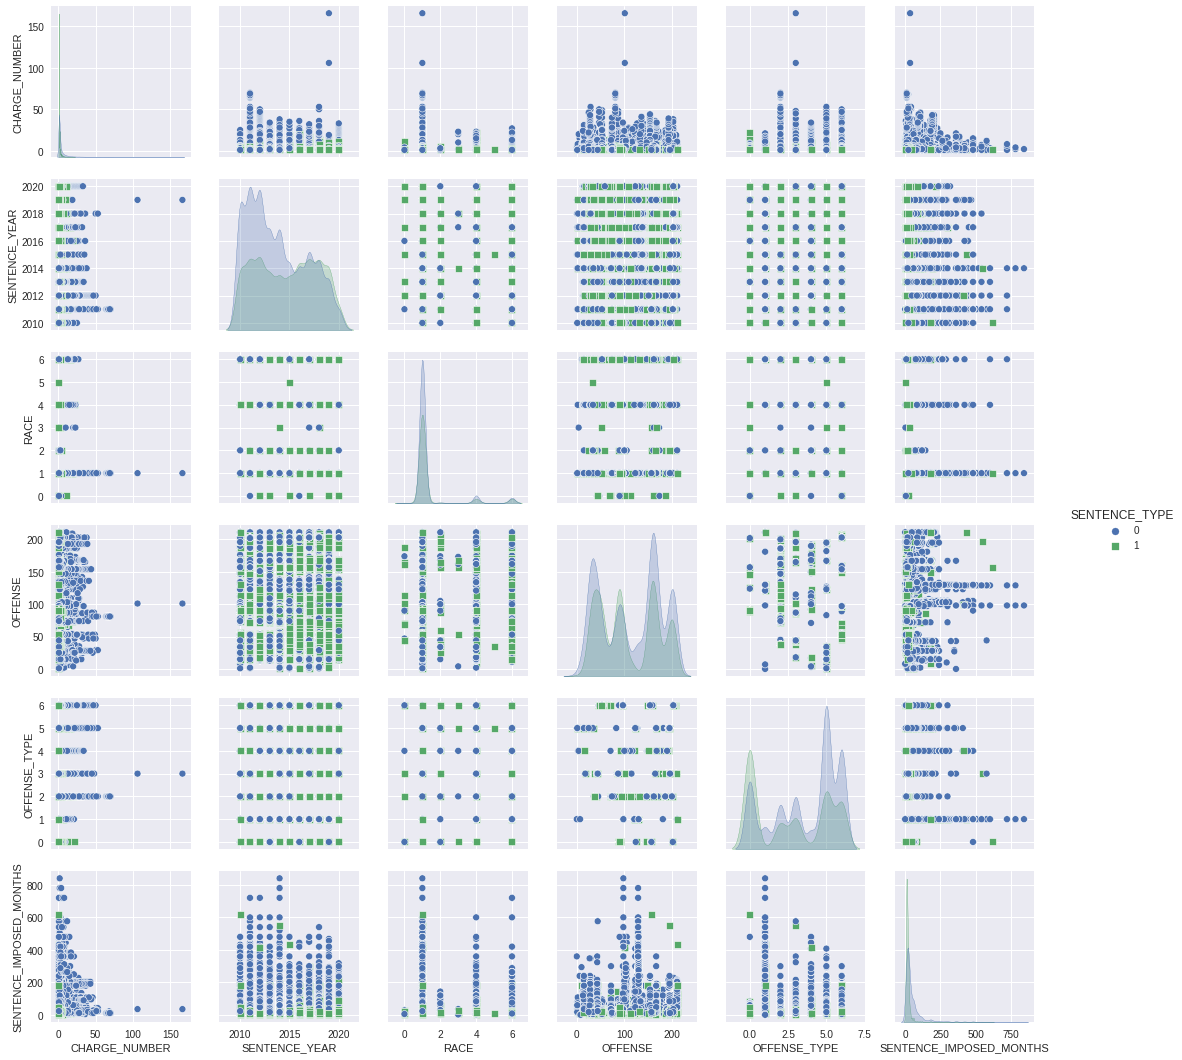

In [42]:
sns.pairplot(df_1, hue='SENTENCE_TYPE', markers=["o", "s"])
plt.show()

Text(0.5, 1.05, 'Correlation of Features')

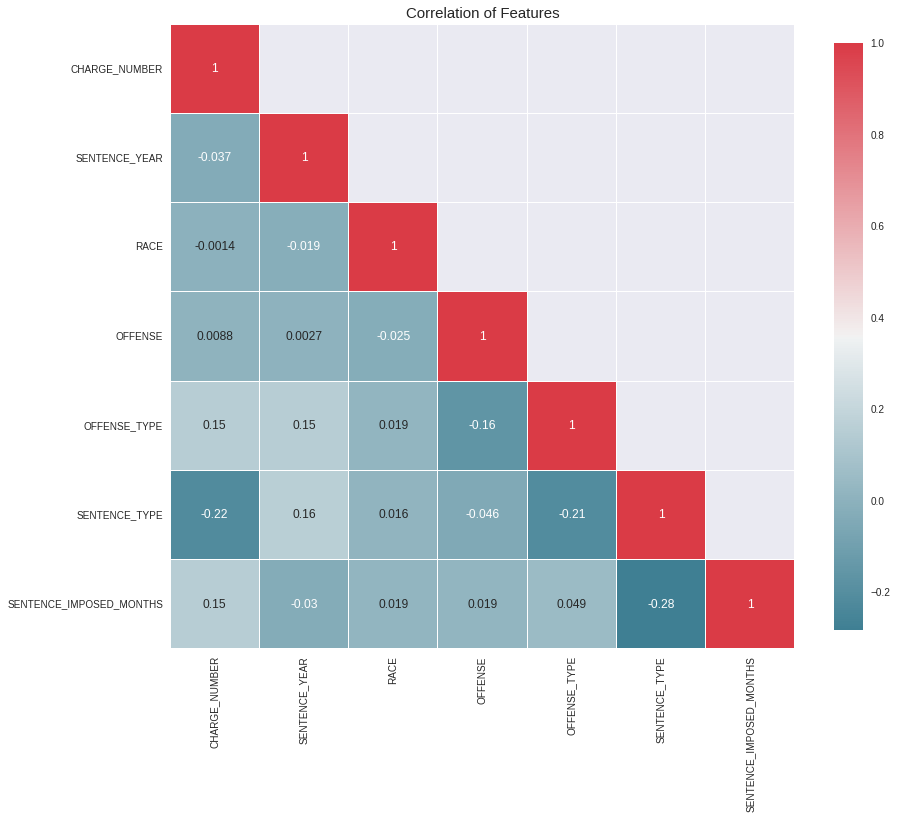

In [43]:
fig, ax = plt.subplots(figsize =(14, 12))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
corr_matrix = df_1.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
np.fill_diagonal(mask, False)  
fig= sns.heatmap(corr_matrix,mask=mask,cmap = colormap,square=True, cbar_kws={'shrink':.9 }, ax=ax,annot=True, linewidths=0.1,vmax=1.0, linecolor='white',annot_kws={'fontsize':12 })
plt.title('Correlation of Features', y=1.05, size=15)

**Reference:**https://www.alpharithms.com/correlation-matrix-heatmaps-python-152514/

**Most of the features are negatively correlated to target variable "SENTENCE_TYPE".I think it is a good correlation because higher correlation might have masked the prediction.**

## **Modeling and Classification**

### Splitting data for test-train split

In [44]:
y=df_1['SENTENCE_TYPE']
X=df_1[['CHARGE_NUMBER','RACE','OFFENSE','OFFENSE_TYPE']]

### Building pipelines

In [45]:
pipeline_lr=Pipeline([('over', SMOTE()),('scalar1',StandardScaler()),('lr_classifier',LogisticRegression())])
pipeline_dt=Pipeline([('over', SMOTE()),('scalar2',StandardScaler()),('dt_classifier',DecisionTreeClassifier())])
pipeline_knn=Pipeline([('over', SMOTE()),('scalar3',StandardScaler()),('knn_classifier',KNeighborsClassifier())])

**Since, there is a slight imbalance in the class data, I have done oversampling to negate the imbalance to some extent using SMOTE function**

**Reference:** 
1. https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
2. https://medium.com/analytics-vidhya/how-to-carry-out-k-fold-cross-validation-on-an-imbalanced-classification-problem-6d3d942a8016

###Test-Train Split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 19,387
Test examples: 4,847


This dataset has almost 24324 rows.So, we alteast need 80 % of the data for training.

####**Classification using Logistic Regression**

In [47]:
param_lr = {'lr_classifier__C':[0.001,0.1, 1, 10]}
results_lr = GridSearchCV(estimator=pipeline_lr, param_grid=param_lr, scoring='accuracy', refit=True, cv=5)
results_lr = results_lr.fit(X_train, y_train)
print(f'\033[1mThis model seems to be best for classification when hyperparameter C is {results_lr.best_params_["lr_classifier__C"]}')
y_predict=results_lr.predict(X_test)
print(f'\033[1mThe accuracy of logistic classifier is {results_lr.score(X_test,y_test)}')

This model seems to be best for classification when hyperparameter C is 1
The accuracy of logistic classifier is 0.5995461109964927


1.  **Hyperparameters Used: Used 0.001, 0.1,1,10 as penalty strengths for grid search.**
2. **This model seems to be best for classification when hyperparameter C is 0.1**


#####**ROC-AUC Curve for Logistic Regression**

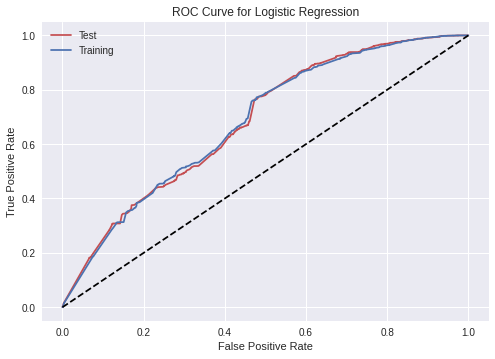

The area of curve is 0.6819385870469088


In [48]:
fpr_test, tpr_test,h=roc_curve(y_test, results_lr.predict_proba(X_test)[:, 1])
fpr_train, tpr_train,l=roc_curve(y_train, results_lr.predict_proba(X_train)[:, 1])
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.show()
print(f'\033[1mThe area of curve is {roc_auc_score(y_test,  results_lr.predict_proba(X_test)[:, 1])}')

1. **Accuracy of 60% cannot be considered a good discrimination.Since, the target variable is slightly imbalanced, I chose roc_auc_score as a metric to decide the model.**
2. **For this classifier, ROC_AUC score is 68% which has to be improved**

####**Classification using Decision Tree Classifier**

In [49]:
param_dt = {'dt_classifier__max_depth':[1,2,3,4]}
results_dt = GridSearchCV(estimator=pipeline_dt, param_grid=param_dt, scoring='accuracy', refit=True, cv=5)
results_dt = results_dt.fit(X_train, y_train)
print(f'\033[1mThis model seems to be best for classification when hyperparameter max depth of tree is {results_dt.best_params_["dt_classifier__max_depth"]}')
y_predict = results_lr.predict(X_test)
print(f'\033[1mThe accuracy of decision tree classifier is {results_dt.score(X_test,y_test)}')

This model seems to be best for classification when hyperparameter max depth of tree is 4
The accuracy of decision tree classifier is 0.6678357747060037



1. **Hyperparameters Used: Used 1,2,3,4 as max_depths for grid search.**
2. **This model seems to be best for classification when hyperparameter max depth is 4**


#####**ROC-AUC Curve for Decision Tree Classifier**

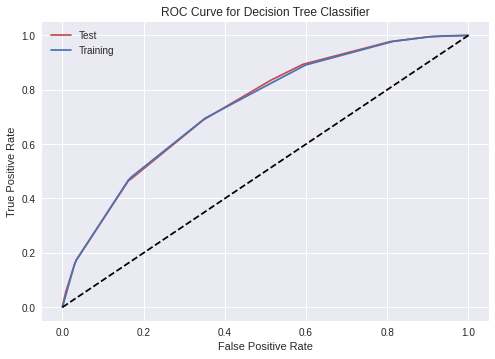

The area of curve is 0.7379443817126652


In [50]:
fpr_test, tpr_test,h=roc_curve(y_test, results_dt.predict_proba(X_test)[:, 1])
fpr_train, tpr_train,l=roc_curve(y_train, results_dt.predict_proba(X_train)[:, 1])
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.title('ROC Curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.show()
print(f'\033[1mThe area of curve is {roc_auc_score(y_test,  results_dt.predict_proba(X_test)[:, 1])}')

1. **This model has 68% accuracy which is better compared to Logistic Regression.**
2. **Even the area has been increased to 74%,but that's not enough for a good classification.**

####**Classification using K-Nearest Neighbors Classifier**

In [51]:
param_knn = {'knn_classifier__n_neighbors':[1, 4, 6, 10]}
results_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_knn, scoring='accuracy', refit=True, cv=5)
results_knn = results_knn.fit(X_train, y_train)
print(f'\033[1mThis model seems to be best for classification when hyperparameter number of neighbors are {results_knn.best_params_["knn_classifier__n_neighbors"]}')
y_predict = results_knn.predict(X_test)
results_knn.score(X_test,y_test)
print(f'\033[1mThe accuracy of KNN classifier is {results_knn.score(X_test,y_test)}')

This model seems to be best for classification when hyperparameter number of neighbors are 10
The accuracy of KNN classifier is 0.6971322467505674


1. **Hyperparameters Used: Used 1,4,6,10 as number of neighbors for grid search.**
2. **This model seems to be best for classification when hyperparameter number of neighbors are 10**

#####**ROC-AUC Curve for KNN**

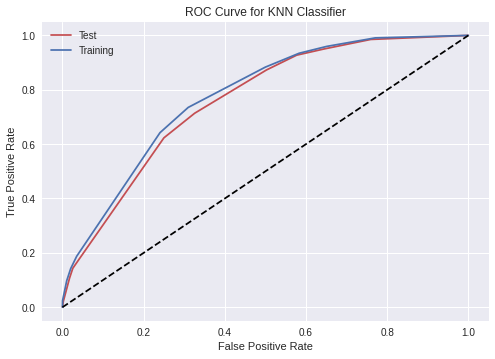

The area of curve is 0.7593748413469534


In [52]:
fpr_test, tpr_test,h=roc_curve(y_test, results_knn.predict_proba(X_test)[:, 1])
fpr_train, tpr_train,l=roc_curve(y_train, results_knn.predict_proba(X_train)[:, 1])
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.title('ROC Curve for KNN Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.show()
print(f'\033[1mThe area of curve is {roc_auc_score(y_test,  results_knn.predict_proba(X_test)[:, 1])}')

1. **It seems like KNN is has better accuracy compared to Logistic and DTC having 70% accuracy**
2. **Also, the area of curve for KNN has also increased to 76%**

## **Conclusion**
**After analyzing the three models, I think KNN Classifier can classify better compared to others.We can improve the accuracy by dealing the dataset imbalance through better modeling techniques.**